# **Week 4:** Model Building: Multiple Linear Regression & Logistic Regression
#### July 12, 2023
---------------- 

This notebook is an exercise in preparing and building multiple linear and logistic regression models using the Ames Iowa housing data (`ames_housing.csv`) and the Titanic training dataset (`titanic_train.csv`). 

[Link to Ames Housing Kaggle Dataset](https://www.kaggle.com/datasets/marcopale/housing)

[Link to Titanic Training Dataset](https://www.kaggle.com/competitions/titanic/data)

Install necessary Python packages

### Setup Dataset

In [53]:
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sma
import scipy as sp
from statsmodels.stats.outliers_influence import OLSInfluence
import numpy as np
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from math import sqrt
import sklearn.metrics

Read the `ames_housing.csv` CSV file into a Pandas Dataframe, and call it `df`.

In [54]:
df = pd.read_csv('ames_housing.csv')

Split the data into training and test sets (70%, 30%). Print out the number of rows in each set to make sure the data is split correctly.

In [55]:
train, test = train_test_split(df, test_size=0.3, random_state=123)
train.shape, test.shape

((2051, 82), (879, 82))

### Multiple Linear Regression

Let's build a MLR model to predict sale price (`Sale_Price`) based on:
  1) the square footage of the greater living area of the home (`Gr_Liv_Area`), and 
  2) the total number of rooms above ground (`TotRms_AbvGrd`).

Remember to use the training dataset.

In [56]:
model_mlr = smf.ols("Sale_Price ~ Gr_Liv_Area + TotRms_AbvGrd", data = train).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.82e-308
Time:                        15:40:24   Log-Likelihood:                -25378.
No. Observations:                2051   AIC:                         5.076e+04
Df Residuals:                    2048   BIC:                         5.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.435e+04   5356.883      8.279      0.000    3.38e+04    5.49e+04
Gr_Liv_Area     137.0996      4.182     32.783      0.000     128.898     145.301
TotRms_AbvGrd -1.061e+04   1344.500     -7.892      0.000   -1.32e+04   -7974.412
==============================================================================
Omnibus:                      369.235   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6501.598
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                      11.702   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At the top right of this summary, we see the p-value for the Global F-test (`Prob (F-statistic)`). Since the p-value is below alpha = 0.05, we can assume that at least one of the two variables is significant at predicting the sale price of the home. 

By looking at the individual t-tests in the output above, we can see that both variables are actually significant since the p-values are both so low they are almost 0 (`P>|t|`).

### Diagnostics

We need to check the assumptions of MLR by looking at the residuals of our model. Get the predicted values and residuals from the model for the training dataset.

In [57]:
train['pred_mlr'] = model_mlr.predict() # get predicted values for Sale_Price for each observation 
train['resid_mlr'] = model_mlr.resid # get error values

train[['Sale_Price', 'pred_mlr', 'resid_mlr']].head(n = 10)

,Sale_Price,pred_mlr,resid_mlr
2278,130000,227710.888850,-97710.888850
1379,109900,104621.715150,5278.284850
2182,140000,138265.597431,1734.402569
1436,207500,207172.249891,327.750109
1599,98000,130396.448481,-32396.448481
452,196000,170346.914449,25653.085551
585,256900,321404.415805,-64504.415805
1078,154000,203607.659111,-49607.659111
2452,290000,305775.056232,-15775.056232
1658,175000,209037.175762,-34037.175762


#### Assumption #1: The model is properly specified.
#### Assumption #2: The random errors are independent.
#### Assumption #4: The random errors have equal variance.

Plot the residuals to verify the model is properly specified, there is no evidence of autocorrelation, and there is constant variance of the residuals.

c:\Users\libust\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


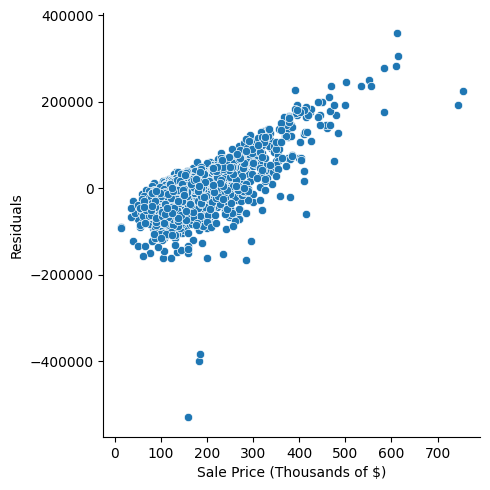

In [58]:
ax = sns.relplot(data = train, y = "resid_mlr", x = train["Sale_Price"]/1000)
ax.set(ylabel = 'Residuals', xlabel = 'Sale Price (Thousands of $)')
plt.show()

There is a positive, linear pattern in the residual plot, and this violates the proper model specification assumption. 

The residuals do not appear to be autocorrelated.

The variability increases as the sale price decreases (heteroskedasticity), and this violates the constant variance assumption. 

Go back and add/remove variables to the model to see how the pattern and variance of residuals changes. 

CHALLENGE: You can conduct formal hypothesis testing to determine if the residuals meet the autocorrelation assumption (Durbin-Watson Test). The null hypothesis of this test assumes that the residuals are not correlated.

In [59]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale_Price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.82e-308
Time:                        15:40:24   Log-Likelihood:                -25378.
No. Observations:                2051   AIC:                         5.076e+04
Df Residuals:                    2048   BIC:                         5.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.435e+04   5356.883      8.279      0.000    3.38e+04    5.49e+04
Gr_Liv_Area     137.0996      4.182     32.783      0.000     128.898     145.301
TotRms_AbvGrd -1.061e+04   1344.500     -7.892      0.000   -1.32e+04   -7974.412
==============================================================================
Omnibus:                      369.235   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6501.598
Skew:                           0.299   Prob(JB):                         0.00
Kurtosis:                      11.702   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At the bottom of this summary, the D-W statistic is given. This number can range from 0 to 4, with a value of 2 indicating no residual correlation. Values smaller than 2 may indicate a positive autocorrelation and values larger than 2 may indicate a negative autocorrelation. We can assume that our dataset is not significantly autocorrelated. 

#### Assumption #3: The random errors are normally distributed.

Build a QQ-plot of the residuals to see if they are normally distributed (We learned about QQ-plots last week!).

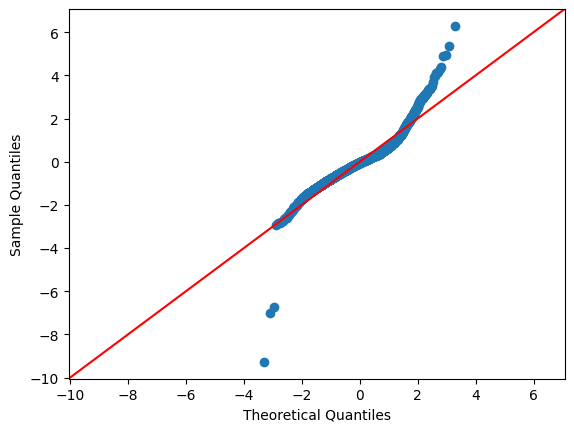

In [60]:
sma.qqplot(train['resid_mlr'], line='45',fit=True)
plt.show()

CHALLENGE: You can conduct formal hypothesis testing to determine if the residuals meet the normality assumption (Shapiro-Wilk Test). The null hypothesis of this test assumes that the residuals are normally distributed. 

In [61]:
sp.stats.shapiro(model_mlr.resid)

ShapiroResult(statistic=0.9043267965316772, pvalue=4.952527136504709e-34)

In this case, since the p-value is lower than alpha = 0.05, we can assume that the distribution of residuals is significantly different from normal. This information is backed up by our QQ-plot. 

We will likely need to transform the residuals/variables to reach normality (Box-Cox Transformation, log, etc.). 

#### Assumption #5: No perfect collinearity.

In [62]:
y, X = dmatrices('Sale_Price ~ Gr_Liv_Area+TotRms_AbvGrd', data=train, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,17.95314,Intercept
1,2.83515,Gr_Liv_Area
2,2.83515,TotRms_AbvGrd


There appears to be only moderate correlation between our original two input variables based on their VIF values.

### CHALLENGE: Influential Points and Outliers

The following code snippets are useful in determining influential points and outliers in a dataset. Can you pinpoint which observation numbers are influential points, outliers or both?

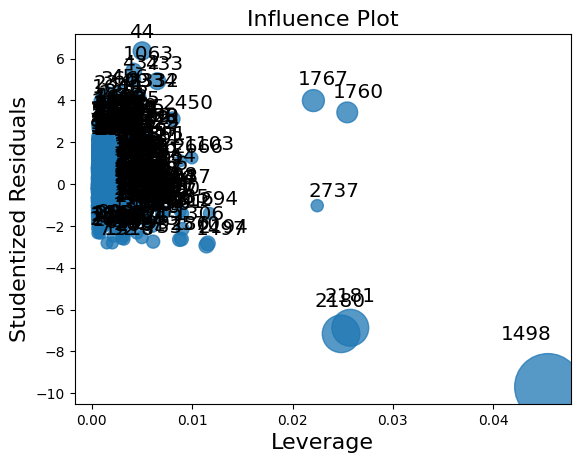

In [63]:
sma.graphics.influence_plot(model_mlr)
plt.show()

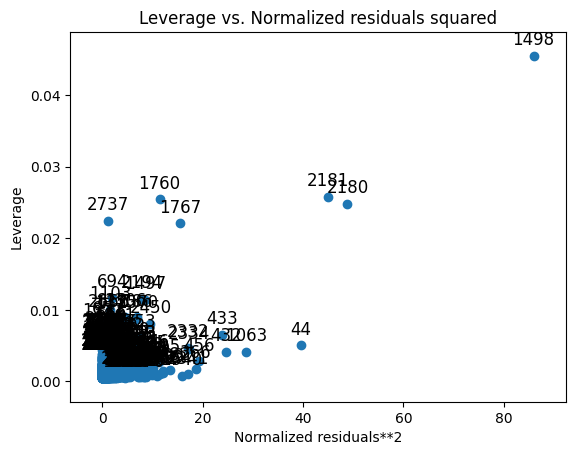

In [64]:
sma.graphics.plot_leverage_resid2(model_mlr)
plt.show()

#### Cook's D

In [65]:
outliers_inf = OLSInfluence(model_mlr)
outliers_inf.cooks_distance

(2278    1.781944e-03
 1379    5.031781e-06
 2182    2.817206e-07
 1436    9.908465e-09
 1599    1.059697e-04
             ...     
 1147    8.893020e-05
 2154    4.140414e-04
 1766    2.646491e-04
 1122    1.680231e-06
 1346    1.052055e-03
 Length: 2051, dtype: float64,
 array([0.99989617, 0.99999998, 1.        , ..., 0.99999405, 1.        ,
        0.99995287]))

#### Studentized Residuals

In [66]:
outliers_inf.resid_studentized

2278   -1.708109
1379    0.092268
2182    0.030306
1436    0.005727
1599   -0.566093
          ...   
1147   -0.349423
2154    1.506709
1766   -0.602232
1122    0.096750
1346   -1.875493
Length: 2051, dtype: float64

#### DFBETA

In [67]:
outliers_inf.dfbetas

array([[ 0.05148433,  0.016026  , -0.04886009],
       [ 0.0006326 , -0.00325255,  0.0022641 ],
       [ 0.00073696, -0.00012323, -0.00026772],
       ...,
       [ 0.00657688, -0.02119442,  0.00936927],
       [ 0.00114169,  0.0002946 , -0.00060663],
       [-0.00075523, -0.03524766,  0.01998028]])

### Metrics for Model Comparison

Calculate the RMSE, MAE, and MAPE for our MLR model. These metrics aren't necessarily useful unless we build more than one model and use them as a baseline for comparison.

#### RMSE

In [68]:
sqrt(sklearn.metrics.mean_squared_error(train['Sale_Price'], train['pred_mlr'])) 

57214.610680433565

#### MAE

In [69]:
sklearn.metrics.mean_absolute_error(train['Sale_Price'], train['pred_mlr'])

38701.175566418584

#### MAPE

This is one of the most interpretable metrics we can use. The MAPE gives the average absolute percentage difference between our predictions and the actual values. 

In [70]:
sklearn.metrics.mean_absolute_percentage_error(train['Sale_Price'], train['pred_mlr'])

0.2371633805890689

### Logistic Regression

Let's pull in another dataset called `titanic_train.csv`. This dataset has already been split into training and test sets. The data is collected from the Titanic shipwreck, documenting features of each passenger and whether or not they survived.

In [71]:
train2 = pd.read_csv('titanic_train.csv')
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Build a logistic regression model to predict whether or not the passenger survived (`Survived`) based on sex, age, and trip fare (`Sex`, `Age`, `Fare`).

In [72]:
log_model = smf.logit("Survived ~ C(Sex) + Age + Fare", data = train2).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.501450
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Jul 2023   Pseudo R-squ.:                  0.2576
Time:                        15:40:28   Log-Likelihood:                -358.04
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.419e-53
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9348      0.239      3.910      0.000       0.466       1.403
C(Sex)[T.male]    -2.3476      0.190    -12.359      0.000      -2.720      -1.975
Age               -0.0106      0.006     -1.627      0.104      -0.023       0.002
Fare               0.0128      0.003      4.738      0.000       0.007       0.018
==================================================================================
"""

Output the odds ratios for each predictor variable in the logistic regression model.

In [73]:
odds_ratio = 100*(np.exp(log_model.params) - 1)
odds_ratio

Intercept         154.680790
C(Sex)[T.male]    -90.440155
Age                -1.051387
Fare                1.285487
dtype: float64

In other words, every additional dollar in fare increases the expected odds of surviving by 1.28%. 

Every additional year in age decreased the expected odds of surviving by 1.05%.

Being a male decreased the expected odds of surviving by 90.44%.